In [4]:
# Topic 5: Review of SLR & Multiple linear regression - part 1
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix


# Graph plotting
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
url = 'https://drive.google.com/file/d/1naXM02nfjESx3ABD-8RQ_E03TXLco9Je/view?usp=sharing'
returnpath = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [6]:
# Import Tesla and SP500 data
returns = pd.read_csv(returnpath)

Text(0, 0.5, 'Daily return of Tesla')

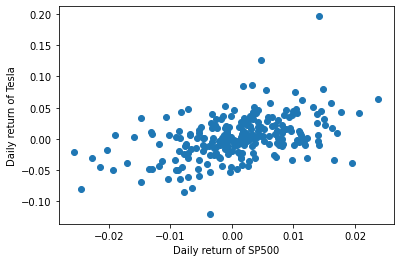

In [7]:
#Use the 2021 data instead of 2020
plt.scatter(returns['SP500'],returns['Tesla'])
plt.xlabel("Daily return of SP500")
plt.ylabel("Daily return of Tesla")

In [8]:
#Regression Output
model=sm.OLS(returns['Tesla'],sm.add_constant(returns['SP500'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Tesla   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     62.86
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           7.37e-14
Time:                        02:21:02   Log-Likelihood:                 519.67
No. Observations:                 252   AIC:                            -1035.
Df Residuals:                     250   BIC:                            -1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.180      0.8

In [9]:
model.predict([1,0.02])

array([0.03783089])

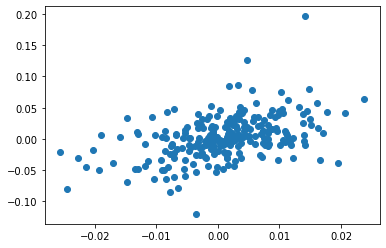

In [10]:
#Interval Prediction (Need further information on x_min and x_max)
plt.scatter(returns['SP500'],returns['Tesla'])
#plt.plot([x_min,x_max],model.predict([[1,x_min],[1,x_max]]),color = 'red',label = 'Fitted Line')
#plt.plot([x_min,x_max],model.get_prediction([[1,x_min],[1,x_max]]).summary_frame()['obs_ci_lower'].values,)
#plt.plot([x_min,x_max],model.get_prediction([[1,x_min],[1,x_max]]).summary_frame()['obs_ci_upper'].values,)

In [11]:
#Pharmacy Data
df_p = pd.read_csv('pharmacy profit.csv')
df_p

FileNotFoundError: ignored

In [ ]:
#Data Cleaning
df_p = df_p.drop(columns="Location",index=110)

In [ ]:
corr = df_p.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
sns_plot = sns.pairplot(df_p)

In [ ]:
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Internally Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');

In [ ]:
X = df_p.drop(columns=["Profit"])
Y = df_p['Profit']


In [ ]:
model_fit1 = sm.OLS(Y,sm.add_constant(X)).fit()
print(model_fit1.summary())
four_in_one(df_p,model_fit1)